<a href="https://colab.research.google.com/github/Cyrill98/StockPrice_LSTM/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as pdr

In [2]:
import pandas as pd

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key='f4f355d85dfe60a6ed92ae48f506080f19b7b7ca')

In [4]:
df.to_csv('APPLE.csv')

In [5]:
df = pd.read_csv('APPLE.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-10-11 00:00:00+00:00,116.30,118.69,116.20,117.70,64041043,27.262788,27.823046,27.239346,27.590973,256164172,0.0,1.0
1,AAPL,2016-10-12 00:00:00+00:00,117.34,117.98,116.75,117.35,37586787,27.506582,27.656610,27.368276,27.508927,150347148,0.0,1.0
2,AAPL,2016-10-13 00:00:00+00:00,116.98,117.44,115.72,116.79,35192406,27.422192,27.530024,27.126826,27.377653,140769624,0.0,1.0
3,AAPL,2016-10-14 00:00:00+00:00,117.63,118.17,117.13,117.88,35652191,27.574564,27.701149,27.457355,27.633168,142608764,0.0,1.0
4,AAPL,2016-10-17 00:00:00+00:00,117.55,117.84,116.78,117.33,23624896,27.555810,27.623791,27.375309,27.504238,94499584,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-10-04 00:00:00+00:00,139.14,142.2100,138.27,141.76,98322008,139.14,142.2100,138.27,141.76,98322008,0.0,1.0
1254,AAPL,2021-10-05 00:00:00+00:00,141.11,142.2400,139.36,139.49,80861062,141.11,142.2400,139.36,139.49,80861062,0.0,1.0
1255,AAPL,2021-10-06 00:00:00+00:00,142.00,142.1500,138.37,139.47,83221119,142.00,142.1500,138.37,139.47,83221119,0.0,1.0
1256,AAPL,2021-10-07 00:00:00+00:00,143.29,144.2150,142.72,143.06,61732656,143.29,144.2150,142.72,143.06,61732656,0.0,1.0
1257,AAPL,2021-10-08 00:00:00+00:00,142.90,144.1781,142.56,144.03,58773155,142.90,144.1781,142.56,144.03,58773155,0.0,1.0


In [8]:
df1 = df.reset_index()['close']

In [9]:
df1.shape

(1258,)

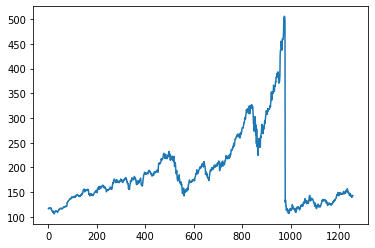

In [10]:
import matplotlib.pyplot as plt

plt.plot(df1)

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.02644987],
       [0.0290474 ],
       [0.02814826],
       ...,
       [0.09063889],
       [0.09386083],
       [0.09288676]])

In [14]:
train_size = int(len(df1)*0.65) #train size will be 65%
test_size = len(df1) - train_size #test size will be 35%
train_data, test_data = df1[0:train_size,:], df1[train_size:len(df1),:1]

In [15]:
train_size, test_size

(817, 441)

In [16]:
len(train_data), len(test_data)

(817, 441)

In [17]:
import numpy
# Convert an array of values into dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [18]:
# Reshape unto x=t, t+1, t+2, t+3 and y=t+4

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(y_test.shape)

(340, 100)
(340,)


(None, None)

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 100, batch_size = 64, verbose = 1)

Epoch 1/100
12/12 [==============================] - 8s 295ms/step - loss: 0.0125 - val_loss: 0.0287
Epoch 2/100
12/12 [==============================] - 2s 175ms/step - loss: 0.0029 - val_loss: 0.0230
Epoch 3/100
12/12 [==============================] - 2s 176ms/step - loss: 0.0014 - val_loss: 0.0191
Epoch 4/100
12/12 [==============================] - 2s 178ms/step - loss: 7.3041e-04 - val_loss: 0.0211
Epoch 5/100
12/12 [==============================] - 2s 177ms/step - loss: 4.9058e-04 - val_loss: 0.0218
Epoch 6/100
12/12 [==============================] - 2s 176ms/step - loss: 4.4971e-04 - val_loss: 0.0204
Epoch 7/100
12/12 [==============================] - 2s 179ms/step - loss: 4.3386e-04 - val_loss: 0.0206
Epoch 8/100
12/12 [==============================] - 2s 175ms/step - loss: 3.9280e-04 - val_loss: 0.0221
Epoch 9/100
12/12 [==============================] - 2s 177ms/step - loss: 3.7806e-04 - val_loss: 0.0214
Epoch 10/100
12/12 [==============================] - 2s 177ms/step

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.6.0'

In [28]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [29]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

191.97510207255934

In [31]:
math.sqrt(mean_squared_error(y_test, test_predict))

215.11798614902943

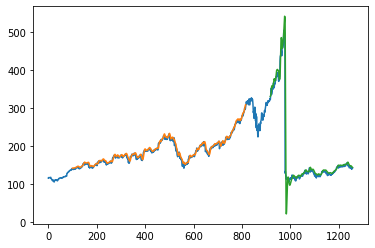

In [32]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

441

In [34]:
x_input = test_data[340:].reshape(1,-1)
x_input.shape

(1, 101)

In [35]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [36]:
temp_input

[0.04780458564363854,
 0.04740496528298116,
 0.05394874868874572,
 0.04925320945102157,
 0.05342424696538289,
 0.05292472151456118,
 0.05279984015185574,
 0.048878565362905246,
 0.047205155102652496,
 0.04638093810879668,
 0.04832908736700137,
 0.04453269394075632,
 0.0504021179879115,
 0.05042709426045261,
 0.0525251011539038,
 0.05349917578300617,
 0.05095159598381538,
 0.05404865377891005,
 0.06186622708426992,
 0.05976822019081868,
 0.061042010090414156,
 0.0651381187871522,
 0.06181627453918781,
 0.06641190868674762,
 0.07060792247365,
 0.06990858684249962,
 0.06918427493880813,
 0.06843498676257559,
 0.07260602427693691,
 0.07647734652080529,
 0.07805085169089365,
 0.07882511613966736,
 0.08554373345321947,
 0.09068884559668317,
 0.09705779509466006,
 0.09373595084669567,
 0.09840651381187876,
 0.09688296118687245,
 0.09973025625655624,
 0.10849692791847748,
 0.10682351765822468,
 0.1016034766971377,
 0.09176282531594981,
 0.10100404615615166,
 0.09913082571557025,
 0.10262750387

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.04740497 0.05394875 0.04925321 0.05342425 0.05292472 0.05279984
 0.04887857 0.04720516 0.04638094 0.04832909 0.04453269 0.05040212
 0.05042709 0.0525251  0.05349918 0.0509516  0.05404865 0.06186623
 0.05976822 0.06104201 0.06513812 0.06181627 0.06641191 0.07060792
 0.06990859 0.06918427 0.06843499 0.07260602 0.07647735 0.07805085
 0.07882512 0.08554373 0.09068885 0.0970578  0.09373595 0.09840651
 0.09688296 0.09973026 0.10849693 0.10682352 0.10160348 0.09176283
 0.10100405 0.09913083 0.1026275  0.10702333 0.10809731 0.10255258
 0.09808182 0.09973026 0.10027973 0.09943054 0.10402618 0.10300215
 0.10327689 0.10097907 0.10085419 0.09963035 0.10027973 0.10784754
 0.10837205 0.11341725 0.11109446 0.10152855 0.10237774 0.10609921
 0.1098956  0.10967081 0.1065238  0.10447575 0.10712323 0.11841251
 0.11519057 0.11688896 0.11973625 0.12135971 0.12732904 0.12338279
 0.12078525 0.10804736 0.10949598 0.10592437 0.10819721 0.10759778
 0.10077926 0.09298666 0.0942105  0.10025476 0.102

In [38]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [39]:
import matplotlib.pyplot as plt

In [40]:
len(df1)

1258

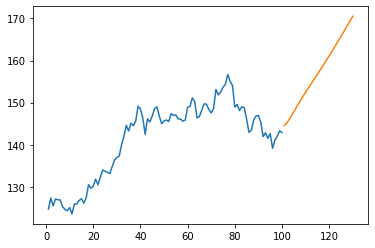

In [42]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

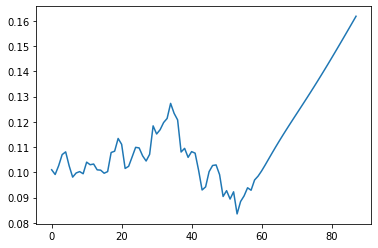

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [44]:
df3=scaler.inverse_transform(df3).tolist()

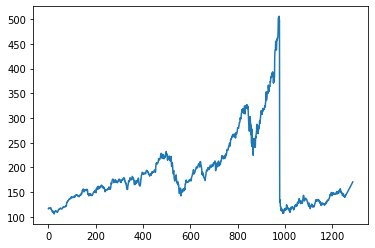

In [45]:
plt.plot(df3)